Advanced Transport Phenomena, R
Chapter 2 Problem 16

Momentum analysis for a rocket. A rocket has a mass of mR and carries fuel with mass mf at a given instant of time. Thus the total mass of the system at the current time is mR + mf. The fuel is consumed at a rate of m˙ . The initial velocity of the rocket is zero and the initial amount of fuel is mf0.
The motion of the rocket is directly upwards, and the air resistance is represented as a force
component Fy (in the negative vertical direction). The exit velocity from the nozzle is vr relative to the rocket.
Derive an equation for the acceleration of the rocket.

Integrate the equation in the above problem analytically to find the velocity of the rocket as a function of time.
Also write a MATLAB code to integrate the system numerically using the ODE45 solver.
Test your solver on the following data.
The total mass of the rocket at the time of launching is 600×106 kg, of which 70% is fuel.
The fuel-consumption rate is 1640 kg/s. The exit velocity from the nozzle relative to the rocket is 3300 m/s.
Neglect air resistance.
Note that the integration should be done only up to the time of complete burning of the
fuel. The results are meaningless after this time.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ode_helpers import state_plotter

In [2]:
#global param1 param2 % parameters to be given to function dydt.
vexit = 3300
mass=6e5
mr=0.3*mass
mf0=0.7*mass
g=9.81
burn=1640
tmax=mf0/burn
def f(t, y,c):
    dydt=[-burn #burning rate mdot
          , (burn*vexit-(y[0]+mr)*g)/(y[0]+mr)] #velocity change
    return dydt


In [3]:
# %% Define time spans, initial values, and constants
n = 20
tspan = np.linspace(0, tmax, n)
yinit = [mf0,0]
c=[]

sol = solve_ivp(lambda t,y:f(t,y,c), [tspan[0],tspan[-1]],yinit, t_eval = tspan)

if sol.status != 0:
    print("WARNING: sol.status is %d" % sol.status)
print(sol.message)

The solver successfully reached the end of the integration interval.


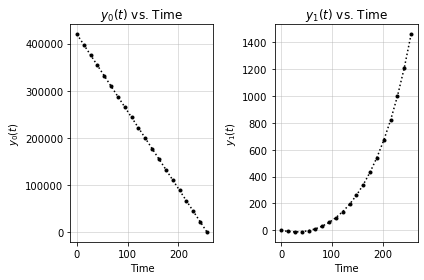

In [4]:
# %% Plot states
state_plotter(sol.t, sol.y, 1)